Schritt 1: Erstelle künstlichen Datensatz...
Datensatz erstellt mit 10000 Zeilen und 11 Spalten.
Schritt 2: Speichere Datensatz in 'brustkrebs_simulationsdaten.xlsx'...
✅ Daten erfolgreich in brustkrebs_simulationsdaten.xlsx gespeichert.
Schritt 3: Führe fünffache Kreuzvalidierung durch...
✅ Kreuzvalidierung abgeschlossen.

Schritt 4: Konfusionsmatrix (Confusion Matrix) erstellen:
---------------------------------------------------------
[[3859 1137]
 [1094 3910]]
---------------------------------------------------------


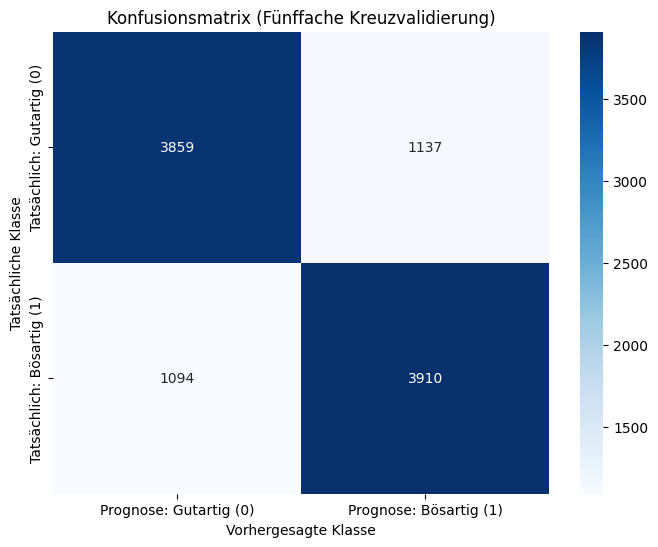

Gesamt-Genauigkeit (Accuracy) des Modells: 0.7769


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Datensatz erstellen (Klassifikation: Brustkrebsprognose) ---

# Wir erzeugen einen künstlichen Datensatz, der ein binäres Klassifikationsproblem simuliert.
# n_samples=10000: Erfüllt die Anforderung
# von mindestens 10000 Zeilen (Trainingsdaten).
# n_features=10: 10 unabhängige Merkmale (z.B. Zellgröße, Dichte, Alter, etc.).
# n_informative=5: 5 dieser Merkmale sind wirklich nützlich für die Prognose.
# n_classes=2: Zwei Klassen (0: Benigne/Gutartig, 1: Maligne/Bösartig).

print("Schritt 1: Erstelle künstlichen Datensatz...")
X, y = make_classification(
    n_samples=10000,
    n_features=10,
    n_informative=5,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

# Erstelle einen DataFrame für bessere Übersichtlichkeit
feature_names = [f'Merkmal_{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['Prognose_Ziel'] = y # Die Zielvariable (0 oder 1)

print(f"Datensatz erstellt mit {df.shape[0]} Zeilen und {df.shape[1]} Spalten.")


# --- 2. Excel-Datei speichern ---

excel_filename = 'brustkrebs_simulationsdaten.xlsx'
print(f"Schritt 2: Speichere Datensatz in '{excel_filename}'...")

# Speichern der Daten in eine Excel-Datei
try:
    df.to_excel(excel_filename, index=False)
    print(f"✅ Daten erfolgreich in {excel_filename} gespeichert.")
except Exception as e:
    print(f"❌ Fehler beim Speichern der Excel-Datei: {e}")


# --- 3. Modelltraining und Fünffach-Kreuzvalidierung ---

# Unabhängige Merkmale (Features) und abhängige Variable (Ziel)
X = df.drop('Prognose_Ziel', axis=1)
y = df['Prognose_Ziel']

# Initialisiere das Modell (Logistische Regression ist ein guter Startpunkt für Klassifikation)
model = LogisticRegression(random_state=42, solver='liblinear')

# Definiere die fünffache Kreuzvalidierung (K=5)
# shuffle=True ist wichtig, um die Daten zufällig zu mischen
cv = KFold(n_splits=5, shuffle=True, random_state=42)

print("Schritt 3: Führe fünffache Kreuzvalidierung durch...")

# cross_val_predict führt die Kreuzvalidierung durch und liefert die Vorhersagen
# für jeden Datenpunkt genau einmal (in dem Fold, in dem er als Testdaten diente)
y_pred = cross_val_predict(model, X, y, cv=cv)

print("✅ Kreuzvalidierung abgeschlossen.")


# --- 4. Konfusionsmatrix erstellen und visualisieren ---

# Berechne die Konfusionsmatrix basierend auf den tatsächlichen Werten (y)
# und den kreuzvalidierten Vorhersagen (y_pred)
conf_mat = confusion_matrix(y, y_pred)

print("\nSchritt 4: Konfusionsmatrix (Confusion Matrix) erstellen:")
print("---------------------------------------------------------")
print(conf_mat)
print("---------------------------------------------------------")

# Zur besseren Interpretation:
# conf_mat[0, 0]: True Negatives (TN) - Korrekt als 0 (Gutartig) vorhergesagt
# conf_mat[0, 1]: False Positives (FP) - Falsch als 1 (Bösartig) vorhergesagt
# conf_mat[1, 0]: False Negatives (FN) - Falsch als 0 (Gutartig) vorhergesagt
# conf_mat[1, 1]: True Positives (TP) - Korrekt als 1 (Bösartig) vorhergesagt

# Visualisierung der Konfusionsmatrix (optional, aber sehr hilfreich!)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_mat,
    annot=True,          # Zeige die Zahlen in den Zellen
    fmt='d',             # Formatiere die Zahlen als Ganzzahlen
    cmap='Blues',        # Farbschema
    xticklabels=['Prognose: Gutartig (0)', 'Prognose: Bösartig (1)'],
    yticklabels=['Tatsächlich: Gutartig (0)', 'Tatsächlich: Bösartig (1)']
)
plt.title('Konfusionsmatrix (Fünffache Kreuzvalidierung)')
plt.ylabel('Tatsächliche Klasse')
plt.xlabel('Vorhergesagte Klasse')
plt.show()

# Berechnung und Ausgabe der Genauigkeit (Accuracy) zur Gesamtbewertung
accuracy = np.trace(conf_mat) / np.sum(conf_mat)
print(f"Gesamt-Genauigkeit (Accuracy) des Modells: {accuracy:.4f}")